In [2]:
from bs4 import BeautifulSoup

In [81]:
import urllib.request
url = "https://news.ycombinator.com/news"
url2 = "https://news.ycombinator.com/news?p=2"
url3 = "https://news.ycombinator.com/news?p=3"
url4 = "https://news.ycombinator.com/news?p=4"
url5 = "https://news.ycombinator.com/news?p=5"

with urllib.request.urlopen(url) as response:
    html = response.read()
    html = html.decode('utf-8')

with urllib.request.urlopen(url2) as response:
    html2 = response.read()
    html2 = html2.decode('utf-8')

with urllib.request.urlopen(url3) as response:
    html3 = response.read()
    html3 = html3.decode('utf-8')

with urllib.request.urlopen(url4) as response:
    html4 = response.read()
    html4 = html4.decode('utf-8')

HTTPError: HTTP Error 503: Service Temporarily Unavailable

In [92]:
# HN started blocking me so I had to grab page 5 in a different cell
with urllib.request.urlopen(url5) as response:
    html5 = response.read()
    html5 = html5.decode('utf-8')

with open('HN.html', 'w') as new_file:
    new_file.write(html)
    new_file.write(html2)
    new_file.write(html3)
    new_file.write(html4)
    new_file.write(html5)

soup = BeautifulSoup(open("HN.html"), "html.parser")
# soup = BeautifulSoup(html, 'html.parser')

In [266]:
myspans = soup.find_all("span", {"class": "rank"})
ages = soup.find_all("span", {"class": "age"})
age_hours = []
for item in ages:
    split = item.get_text().split()
    if split[1] == 'hour' or split[1] == 'hours':
        hours = split[0]
        age_hours.append(hours)
    if split[1] == 'minutes':
        hours = float(split[0]) / 60
        age_hours.append(hours)
    elif split[1] == 'day' or split[1] == 'days':
        hours = int(split[0]) * 24
        age_hours.append(str(hours)) 

In [267]:
ranks = []
for element in myspans:
    ranks.append(element.get_text()[:-1])

In [239]:
score_spans = soup.find_all("span", {"class": "score"})
scores = []
for item in score_spans:
    split = item.get_text().split()
    points = split[0]
    scores.append(points)
# appending zero for 1 article missing score
scores.append(0)

In [160]:
a_tags = soup.find_all("a", {"class": "storylink"})

titles = []
for element in a_tags:
    titles.append(element.get_text())    


West African countries to adopt single currency in 2027


In [260]:
tds = soup.find_all("td", {"class": "subtext"})
comments = []

for item in tds:
    split = item.get_text().split()
    if split[-1] == "comment" or split[-1] == "comments":
        comments.append(split[-2])
    else:
        comments.append(0)
print(len(comments))


150


In [264]:
with open('HN_Data.csv', 'w') as new_file:
    new_file.write("Rank,TitleLen,Age,Points,Comments\n")
    for i in range(150):
        new_file.write(ranks[i] + "," + str(len(titles[i])) + "," + str(age_hours[i]) + "," + str(scores[i]) + "," + str(comments[i]) + "\n")


In [265]:
import pandas as pd

df = pd.read_csv('HN_Data.csv')
df

,Rank,TitleLen,Age,Points,Comments
0,1,26,2.0,303,193
1,2,69,2.0,365,141
2,3,78,9.0,345,79
3,4,11,8.0,374,43
4,5,32,2.0,40,3
...,...,...,...,...,...
145,146,50,24.0,152,196
146,147,39,24.0,6,24
147,148,48,16.0,19,0
148,149,80,9.0,41,11


In [275]:
import statsmodels.formula.api as sm

slr = sm.ols(formula="Rank ~ Age", data=df).fit()
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     58.94
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           2.03e-12
Time:                        19:56:28   Log-Likelihood:                -752.92
No. Observations:                 150   AIC:                             1510.
Df Residuals:                     148   BIC:                             1516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4903      4.730     10.041      0.000      38.144      56.837
Age            1.6110      0.210      7.677      0.000       1.196       2.026
==============================================================================
Omnibus:                       14.790   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.464
Skew:                           0.153   Prob(JB):                       0.0651
Kurtosis:                       2.117   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
slr = sm.ols(formula="Rank ~ Age + Points", data=df).fit()
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.98e-11
Time:                        20:22:00   Log-Likelihood:                -752.92
No. Observations:                 150   AIC:                             1512.
Df Residuals:                     147   BIC:                             1521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.3173      5.119      9.244      0.000      37.202      57.433
Age            1.6114      0.211      7.652      0.000       1.195       2.028
Points         0.0011      0.012      0.090      0.928      -0.023       0.025
==============================================================================
Omnibus:                       14.568   Durbin-Watson:                   0.593
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.429
Skew:                           0.154   Prob(JB):                       0.0662
Kurtosis:                       2.120   Cond. No.                         500.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
slr = sm.ols(formula="Rank ~ Age + Comments + TitleLen", data=df).fit()
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     24.16
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           9.44e-13
Time:                        20:14:48   Log-Likelihood:                -747.84
No. Observations:                 150   AIC:                             1504.
Df Residuals:                     146   BIC:                             1516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6354      8.491      6.435      0.000      37.855      71.416
Age            1.9324      0.229      8.435      0.000       1.480       2.385
Comments      -0.0898      0.031     -2.932      0.004      -0.150      -0.029
TitleLen      -0.1333      0.153     -0.871      0.385      -0.436       0.169
==============================================================================
Omnibus:                        6.224   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.139
Skew:                           0.050   Prob(JB):                        0.208
Kurtosis:                       2.298   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age seems to have the highest correlation to Rank and contributes most to the r-squared value, followed by comments and TitleLen. Points had little to no correlation and had a very high p-value when I included it in the model. TitleLen also has a high p-vlue at 38%. The highest r-squared value I could achieve is 33.2 which is very low indicating a weak linear relationship. Age of the article has a strong negative impact on rank and comments and title length have a small positive effect. The coefficent of -.089 for comments makes intuitive sense to me, a few comments doesn't impact the rank much, but many comments will. 

In [308]:
df['Rank'] = pd.to_numeric(df['Rank'])
df['FrontPage'] = 0

for i, rank in enumerate(df.Rank):
    if rank <= 30:
        df['FrontPage'].iloc[i] = 1
    else:
        df['FrontPage'].iloc[i] = 0
df

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Rank,TitleLen,Age,Points,Comments,FrontPage
0,1,26,2.000000,303,193,1
1,2,69,2.000000,365,141,1
2,3,78,9.000000,345,79,1
3,4,11,8.000000,374,43,1
4,5,32,2.000000,40,3,1
5,6,13,8.000000,257,36,1
6,7,43,1.000000,10,1,1
7,8,58,0.750000,23,0,1
8,9,57,1.000000,53,5,1
9,10,54,0.950000,289,36,1


In [347]:
HN_model = sm.logit(formula="FrontPage ~ Age + Comments", data=df).fit()
HN_model.summary()

Optimization terminated successfully.
         Current function value: 0.344064
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.3124
Time:                        01:25:34   Log-Likelihood:                -51.610
converged:                       True   LL-Null:                       -75.060
Covariance Type:            nonrobust   LLR p-value:                 6.539e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7241      0.393      1.842      0.065      -0.046       1.495
Age           -0.2048      0.039     -5.225      0.000      -0.282      -0.128
Comments       0.0054      0.003      1.899      0.058      -0.000       0.011
==============================================================================
"""

In [322]:
import numpy as np
import matplotlib.pyplot as plt

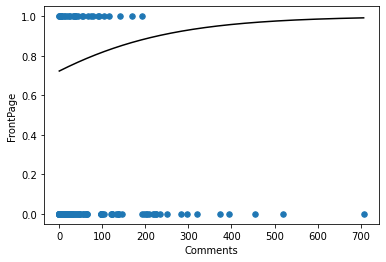

In [338]:
df.plot.scatter(x='Comments', y='FrontPage', s=30)
x = np.linspace(df['Comments'].min(),df['Comments'].max(),1000)
logistic = lambda x: 1/(1+np.exp(-x))
par = dict(HN_model.params)
plt.plot(x,logistic(par['Intercept'] + par['Comments']*x),color='Black')
plt.show()

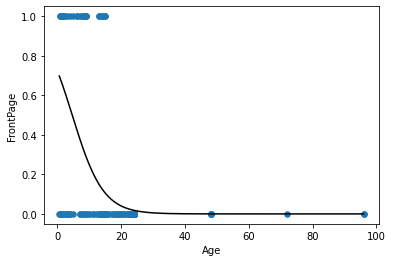

In [339]:
df.plot.scatter(x='Age', y='FrontPage', s=30)
x = np.linspace(df['Age'].min(),df['Age'].max(),1000)
logistic = lambda x: 1/(1+np.exp(-x))
par = dict(HN_model.params)
plt.plot(x,logistic(par['Intercept'] + par['Age']*x),color='Black')
plt.show()

According to the logistic regression models we start with about a 72% chance of getting on the front page. Age in hours quickly decreases the odds of getting on the front page. After 20 hours there is little chance of success. Comments can have a moderate increase in the odds especially when they get into the hundreds, they need to happen quickly though before age takes effect. Since the pseudo r-squared value is low I think there are other important variables missing from the model such as the name of the title, or the content of the article. But those would be hard to quantify.    